In [2]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
uploaded = files.upload()
import io


Saving mxmh_survey_results.csv to mxmh_survey_results.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['mxmh_survey_results.csv']))

In [5]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

#BPM
This has some nasty outliers that need to be replaced, so by exploring values around the mode and meadian we can select a suitable threshold  to set max values and fill in missing values with the mean

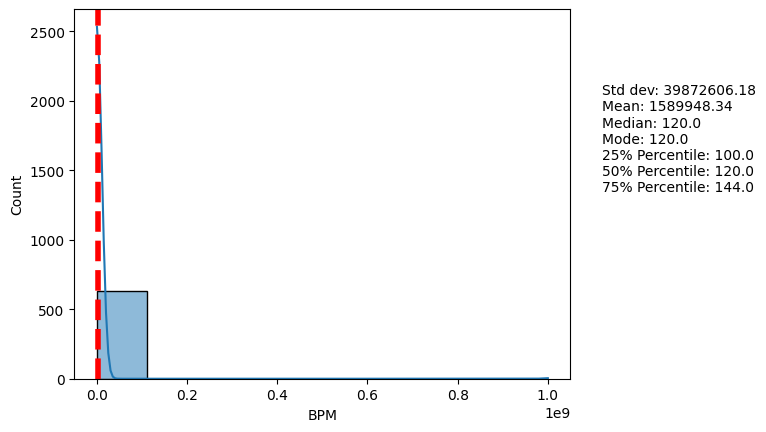

In [7]:
import seaborn as sns
sns.histplot(df.BPM, bins = int(round(df.BPM.count()**(1/3), 0)), kde = True)
plt.axvline(df.BPM.mean(), color='red', linestyle='dashed', linewidth=4)
text  = 'Std dev: ' + str(round(df.BPM.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.BPM.mean(), 2)) + '\n'
text += 'Median: ' + str(round(df.BPM.median(), 2)) + '\n'
text += 'Mode: ' + str(round(df.BPM.mode()[0], 2)) + '\n'
text += '25% Percentile: ' + str(round(df.BPM.quantile(0.25), 2)) + '\n'
text += '50% Percentile: ' + str(round(df.BPM.quantile(0.50), 2)) + '\n'
text += '75% Percentile: ' + str(round(df.BPM.quantile(0.75), 2))

plt.text(0.95, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)

plt.show()


In [8]:
outlier_thereshold = 190

outliers = df['BPM'] > outlier_thereshold
# Calculate the mean excluding outliers
mean_value = df.loc[~outliers, 'BPM'].mean()
# Replace outliers with the mean value
df.loc[outliers, 'BPM'] = mean_value

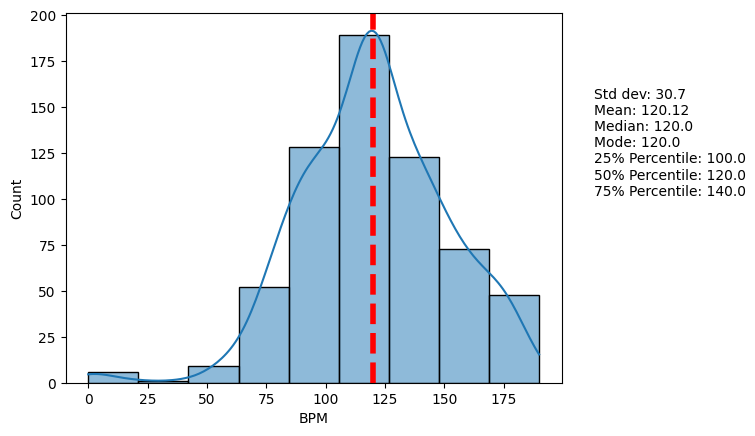

In [9]:
import seaborn as sns
sns.histplot(df.BPM, bins = int(round(df.BPM.count()**(1/3), 0)), kde = True)
plt.axvline(df.BPM.mean(), color='red', linestyle='dashed', linewidth=4)
text  = 'Std dev: ' + str(round(df.BPM.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.BPM.mean(), 2)) + '\n'
text += 'Median: ' + str(round(df.BPM.median(), 2)) + '\n'
text += 'Mode: ' + str(round(df.BPM.mode()[0], 2)) + '\n'
text += '25% Percentile: ' + str(round(df.BPM.quantile(0.25), 2)) + '\n'
text += '50% Percentile: ' + str(round(df.BPM.quantile(0.50), 2)) + '\n'
text += '75% Percentile: ' + str(round(df.BPM.quantile(0.75), 2))

plt.text(0.95, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)

plt.show()




#Primary Streaming Service

In [10]:
df['Primary streaming service'].value_counts(normalize = True)

Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: Primary streaming service, dtype: float64

Text(0, 0.5, '')

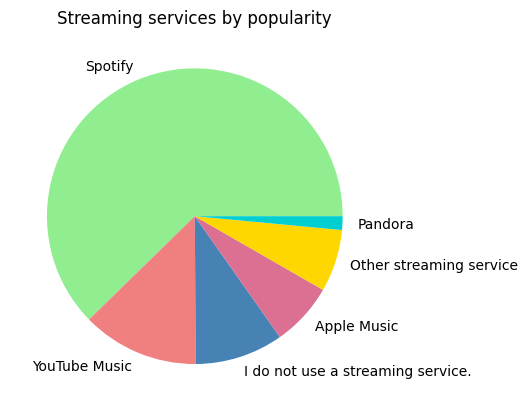

In [11]:
import matplotlib.pyplot as plt

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

##Fav Genere

In [12]:
df['Fav genre'].value_counts(normalize = True)

Rock                0.255435
Pop                 0.154891
Metal               0.119565
Classical           0.072011
Video game music    0.059783
EDM                 0.050272
R&B                 0.047554
Hip hop             0.047554
Folk                0.040761
K pop               0.035326
Country             0.033967
Rap                 0.029891
Jazz                0.027174
Lofi                0.013587
Gospel              0.008152
Latin               0.004076
Name: Fav genre, dtype: float64

Text(0, 0.5, '')

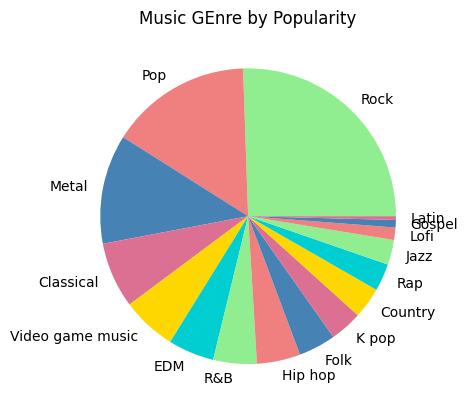

In [13]:
import matplotlib.pyplot as plt



services = df['Fav genre'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Music GEnre by Popularity')
plt.ylabel("")

# Exploratory

In [14]:
df_ex = df.Exploratory
df_ex.value_counts(normalize = True)

Yes    0.713315
No     0.286685
Name: Exploratory, dtype: float64

#Foreign Language

In [15]:
df_fl = df['Foreign languages']
df_fl.value_counts(normalize = True)

Yes    0.551913
No     0.448087
Name: Foreign languages, dtype: float64

##  Listening Freq All, this may need change, since there is order to its catigoricalness, changed to numerical values 0, never, 1 rarely, 2, sometimes and 3, very frequently

In [16]:
# df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
#                         [0, 1, 2, 3], inplace=True) done with later replacements


df_fc = df['Frequency [Classical]']
df_fc.value_counts()

Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: Frequency [Classical], dtype: int64

In [17]:
df_fc.value_counts(normalize = True)

Rarely             0.351902
Sometimes          0.271739
Never              0.229620
Very frequently    0.146739
Name: Frequency [Classical], dtype: float64

# Fav Genre

In [18]:
df_fg = df['Fav genre']
print('value counts fav genere', df_fg.value_counts())
print('len value count for veriication', len(df_fg.value_counts()))

value counts fav genere Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64
len value count for veriication 16


# Primary Streaming Service

In [19]:
df_pss = df['Primary streaming service']
print('value counts fav genere', df_pss.value_counts())
print('len value count for veriication', len(df_pss.value_counts()))

value counts fav genere Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64
len value count for veriication 6


##Changing Catigorical to Numberical Variables

In [20]:
df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

df.replace(['Video game music'],
                       ['Video game'], inplace=True)

df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)


# using sk lean to make process shorter
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Fav genre'] = encoder.fit_transform(df['Fav genre'])
df['Primary streaming service'] = encoder.fit_transform(df['Primary streaming service'])
df['Music effects'] = encoder.fit_transform(df['Music effects'])




###Fav Genre

In [21]:
df_fg = df['Fav genre']
print('value counts fav genere', df_fg.value_counts())
print('len value count for veriication', len(df_fg.value_counts()))

value counts fav genere 14    188
11    114
10     88
0      53
15     44
2      37
12     35
5      35
3      30
7      26
1      25
13     22
6      20
9      10
4       6
8       3
Name: Fav genre, dtype: int64
len value count for veriication 16


In [22]:
df_pss = df['Primary streaming service']
print('value counts fav genere', df_pss.value_counts())
print('len value count for veriication', len(df_pss.value_counts()))

value counts fav genere 4    458
5     94
1     71
0     51
2     50
3     11
6      1
Name: Primary streaming service, dtype: int64
len value count for veriication 7


In [23]:
df_me = df['Music effects']
print('Value Counts ME:', df_me.value_counts())
print('len value count for verification:', len(df_me.value_counts()))

Value Counts ME: 0    542
1    169
2     17
3      8
Name: Music effects, dtype: int64
len value count for verification: 4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     736 non-null    int64  
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    float64
 5   Instrumentalist               732 non-null    float64
 6   Composer                      735 non-null    float64
 7   Fav genre                     736 non-null    int64  
 8   Exploratory                   736 non-null    int64  
 9   Foreign languages             732 non-null    float64
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    int64  
 12  Frequency [Country]           736 non-null    int64  
 13  Frequ

#Handling Missing Data

In [25]:
# Dealing with missing Data

# Numerical Values
mean_value_Age = df['Age'].mean()
mean_value_BPM = df['BPM'].mean() # remove the wrong outlier

# Catigorical Values
mode_value_SService = df['Primary streaming service'].mode()[0]
mode_value_WWorking = df['While working'].mode()[0]
mode_value_Instrumentalist = df['Instrumentalist'].mode()[0]
mode_value_Composer = df['Composer'].mode()[0]
mode_value_Foreign_languages = df['Foreign languages'].mode()[0]
mode_value_MEffects = df['Music effects'].mode()[0]

# Replace missing values with the mean
df['Age'].fillna(mean_value_Age, inplace=True)
df['BPM'].fillna(mean_value_Age, inplace=True)

# Replace catigorical values with the mode
df['Primary streaming service'].fillna(mode_value_SService, inplace=True)
df['While working'].fillna(mode_value_WWorking, inplace=True)
df['Instrumentalist'].fillna(mode_value_Instrumentalist, inplace=True)
df['Composer'].fillna(mode_value_Composer, inplace=True)
df['Foreign languages'].fillna(mode_value_Foreign_languages, inplace=True)
df['Music effects'].fillna(mode_value_MEffects, inplace=True)

#Modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
# Split the data into features (X) and target variable (y)
df_target = df['Music effects']  # Target
df_features = df.drop(['Timestamp', 'Permissions', 'Music effects'], axis=1) # Features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

# Initialize the classifiers
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()

# Train the classifiers
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
logistic_regression_preds = logistic_regression.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)

# Evaluate the classifiers
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Print the evaluation metrics
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print()
print("Decision Tree Accuracy:", decision_tree_accuracy)
print()
print("Random Forest Accuracy:", random_forest_accuracy)
print()
print("KNN Accuracy:", knn_accuracy)
print()
print("SVM Accuracy:", svm_accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7837837837837838

Decision Tree Accuracy: 0.5540540540540541

Random Forest Accuracy: 0.777027027027027

KNN Accuracy: 0.75

SVM Accuracy: 0.7635135135135135


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [51]:

# Convert the target variable to categorical labels
encoder = LabelEncoder()
encoded_y_train = encoder.fit_transform(y_train)
encoded_y_test = encoder.transform(y_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(encoded_y_train, dtype=torch.long)
y_test_tensor = torch.tensor(encoded_y_test, dtype=torch.long)

# Create a DataLoader for training and test data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Set the hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(encoder.classes_)
learning_rate = 0.001
num_epochs = 100

# Initialize the model
neural_network =  NeuralNet(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_network.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = neural_network(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = neural_network(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

NN_accuracy = correct / total
print("Neural Network Accuracy:", NN_accuracy)


Neural Network Accuracy: 0.7635135135135135


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
Accuracies = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, knn_accuracy, svm_accuracy, NN_accuracy]

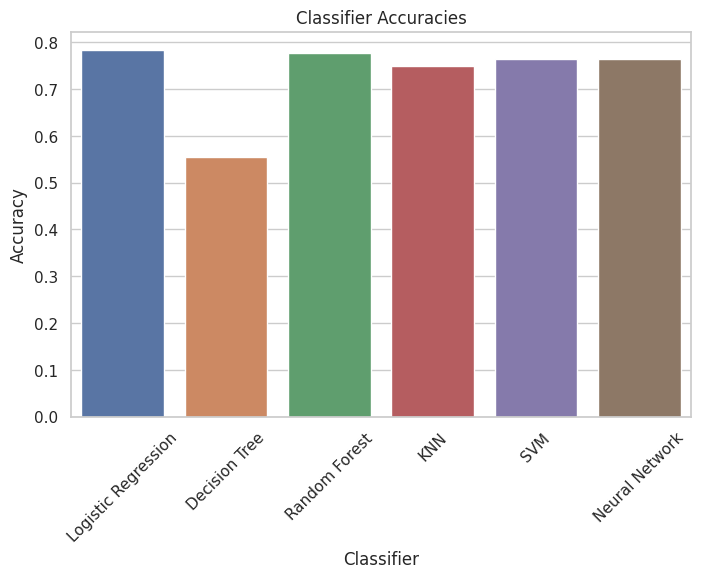

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the accuracies
accuracies = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, knn_accuracy, svm_accuracy, NN_accuracy]

# Define the classifiers' names
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Neural Network']

# Create a dataframe for the accuracies and classifiers
data = {'Classifier': classifiers, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
plt.title("Classifier Accuracies")
sns.barplot(x="Classifier", y="Accuracy", data=df)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [55]:
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print()
print("Decision Tree Accuracy:", decision_tree_accuracy)
print()
print("Random Forest Accuracy:", random_forest_accuracy)
print()
print("KNN Accuracy:", knn_accuracy)
print()
print("SVM Accuracy:", svm_accuracy)
print()
print("NN Accuracy:", NN_accuracy)

Logistic Regression Accuracy: 0.7837837837837838

Decision Tree Accuracy: 0.5540540540540541

Random Forest Accuracy: 0.777027027027027

KNN Accuracy: 0.75

SVM Accuracy: 0.7635135135135135

NN Accuracy: 0.7635135135135135


In [58]:
from sklearn.model_selection import cross_val_score

# Initialize the classifiers
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
# neural_network = MLPClassifier()

# Create a list of classifiers
classifiers = [logistic_regression, decision_tree, random_forest, knn, svm]

# Perform cross-validation for each classifier
for classifier in classifiers:
    scores = cross_val_score(classifier, df_features, df_target, cv=5)
    average_accuracy = scores.mean()
    print("Average Accuracy for {}: {:.4f}".format(classifier.__class__.__name__, average_accuracy))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy for LogisticRegression: 0.7228
Average Accuracy for DecisionTreeClassifier: 0.5380
Average Accuracy for RandomForestClassifier: 0.7323
Average Accuracy for KNeighborsClassifier: 0.7038
Average Accuracy for SVC: 0.7364
